In [268]:
# importação das bibliotecas

#Algebra Linear
import numpy as np 

# Processamento/manipulação dos dados
import pandas as pd 

# Visualização dos dados
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from IPython.display import display

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, precision_score, recall_score,f1_score, precision_recall_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

In [193]:
# importando o dataset

dt_titanic = pd.read_csv("titanic3.csv")

In [194]:
dt_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [195]:
# 01 - Quais as minhas variávies? e # 02 - Quais os tipos das variáveis?

dt_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [196]:
dt_titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [197]:
# R: 01- São 14 variáveis
# R: 02 - 3 variáveis são do tipo float, 4 do tipo int e 7 são objetos.

In [198]:
# 03 - Tenho valores faltantes ou nulos?

print(dt_titanic.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [199]:
dt_total = dt_titanic.isnull().sum().sort_values(ascending=False)
perc_1 = dt_titanic.isnull().sum()/dt_titanic.isnull().count()*100
perc_2 = (round(perc_1, 1)).sort_values(ascending=False)
dados_fatantes = pd.concat([dt_total, perc_2], axis=1, keys=['Total', '%'])
dados_fatantes.head(7)

,Total,%
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home.dest,564,43.1
age,263,20.1
embarked,2,0.2
fare,1,0.1


In [200]:
# R: 03 - Sim. As dimensões mais significantes na falta de dados: 
    # "body" fata 90% dos registros. Falta 1188 registros
    # "cabin" falta 77,5%. Total de 1014 registros faltantes
    # "boat" falta 62,9%. Tota de 823 registros faltantes
    # "home.dest" falta 43,1%. Falta 564 registros
    # "age" falta 263 registros. 20,1% do total de gegistros no dataset

In [201]:
# 04 - Interpretação do sumário

dt_titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [202]:
# 05 - Tenho relação/correlação forte entre variáveis no dataset?

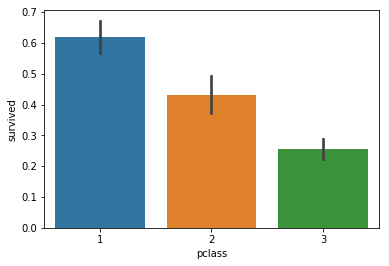

In [203]:
sns.barplot(x='pclass', y='survived', data=dt_titanic) # avaliação da classe em relação a sobrevivencia

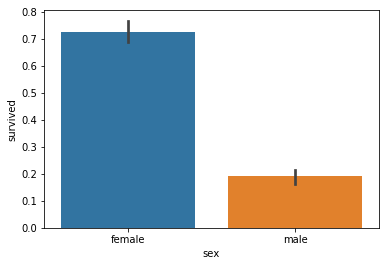

In [204]:
sns.barplot(x='sex', y='survived', data=dt_titanic) # avaliação do sexo em relação a sobrevivencia

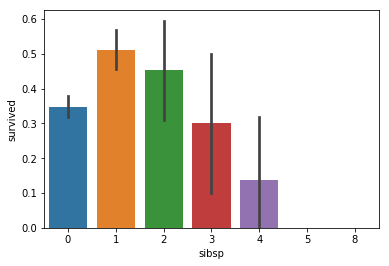

In [205]:
sns.barplot(x='sibsp', y='survived', data=dt_titanic) # avaliação do número de irmãos / cônjuges a bordo do Titanic em relação a sobrevivencia

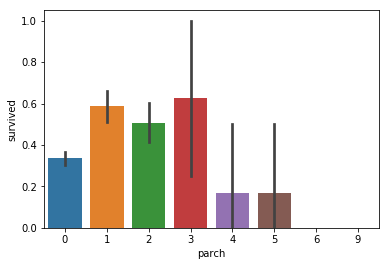

In [206]:
sns.barplot(x='parch', y='survived', data=dt_titanic) # avaliação do número de pais / filhos a bordo do Titanic em relação a sobrevivencia

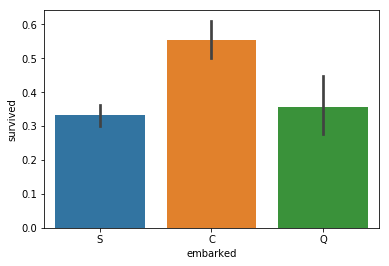

In [207]:
sns.barplot(x='embarked', y='survived', data=dt_titanic) # avaliação dos sobreviventes de acordo com o porto de embarcação

In [208]:
# R: 05 - Pela avalação do volume de sobreviventes por dimensão, é possivel obervar que:
    # Idade e sexo principalmente possuem grande relação com a sobrevivencia. Outra variável é a classe; mais da metade da classe 1 sobreviveu.

In [209]:
# 06 - Quais Variáveis imagino que terção influencia na pergunta que sedejo responder?

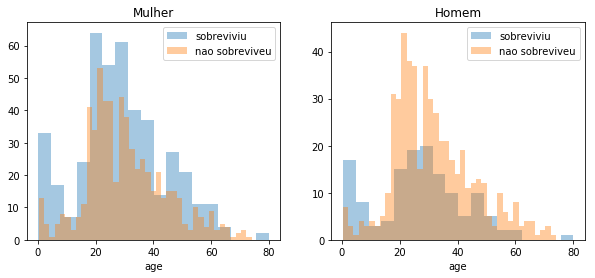

In [210]:
survived = 'sobreviviu'
not_survived = 'nao sobreviveu'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = dt_titanic[dt_titanic['sex']=='female']
men = dt_titanic[dt_titanic['sex']=='male']
ax = sns.distplot(dt_titanic[dt_titanic['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(dt_titanic[dt_titanic['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Mulher')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Homem')

In [211]:
# R: 06 - Isolando as variáveis 'age' e 'sex' em comparação com o resultado apontando quem sobreviviu, podemos notar que:
    # mulheres e crianças foram em maior numero os sobreviventes

In [212]:
# 07 - Qual o modelo que utilizarei para prever as chances de sobrevivencia do passageiro?

In [213]:
    # limpeza dos dados para criação de um dataset "limpo"

In [214]:
dt_titanic_em_tratamento = dt_titanic

In [215]:
dt_titanic_em_tratamento.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [216]:
    # Filtrando as dimensões que interessam

    filtradas = ['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'embarked']
    dt_titanic_em_tratamento = dt_titanic_em_tratamento[filtradas]

In [217]:
    # tratando a dimensão "embarked" retirando as linhas em branco

dt_titanic_em_tratamento = dt_titanic_em_tratamento.dropna(subset=['embarked'])

In [218]:
    # tratando a dimensão "age": substitui os valores faltantes pela média dos demais

media = dt_titanic_em_tratamento["age"].median()
dt_titanic_em_tratamento["age"].fillna(media, inplace=True)

In [219]:
dt_titanic_em_tratamento.head()

,pclass,survived,sex,age,sibsp,parch,embarked
0,1,1,female,29.00,0,0,S
1,1,1,male,0.92,1,2,S
2,1,0,female,2.00,1,2,S
3,1,0,male,30.00,1,2,S
4,1,0,female,25.00,1,2,S


In [220]:
dt_titanic_em_tratamento['pclass'] = dt_titanic_em_tratamento['pclass'].replace(1, 'a')
dt_titanic_em_tratamento['pclass'] = dt_titanic_em_tratamento['pclass'].replace(2, 'b')
dt_titanic_em_tratamento['pclass'] = dt_titanic_em_tratamento['pclass'].replace(3, 'c')

In [221]:
dt_titanic_em_tratamento.head()

,pclass,survived,sex,age,sibsp,parch,embarked
0,a,1,female,29.00,0,0,S
1,a,1,male,0.92,1,2,S
2,a,0,female,2.00,1,2,S
3,a,0,male,30.00,1,2,S
4,a,0,female,25.00,1,2,S


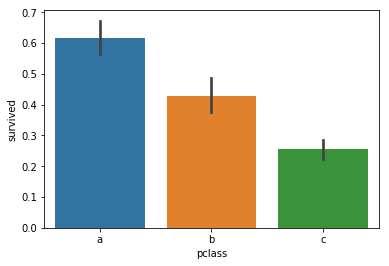

In [222]:
sns.barplot(x='pclass', y='survived', data=dt_titanic_em_tratamento) # avaliação da classe em relação a sobrevivencia

In [223]:
    #Substituindo os valores categóricos (nominais) por valores numéricos - Dummy encoding

dt_titanic_tratado = pd.get_dummies(dt_titanic_em_tratamento)
dt_titanic_tratado.head(15)

,survived,age,sibsp,parch,pclass_a,pclass_b,pclass_c,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,29.00,0,0,1,0,0,1,0,0,0,1
1,1,0.92,1,2,1,0,0,0,1,0,0,1
2,0,2.00,1,2,1,0,0,1,0,0,0,1
3,0,30.00,1,2,1,0,0,0,1,0,0,1
4,0,25.00,1,2,1,0,0,1,0,0,0,1
5,1,48.00,0,0,1,0,0,0,1,0,0,1
6,1,63.00,1,0,1,0,0,1,0,0,0,1
7,0,39.00,0,0,1,0,0,0,1,0,0,1
8,1,53.00,2,0,1,0,0,1,0,0,0,1
9,0,71.00,0,0,1,0,0,0,1,1,0,0


In [224]:
dt_titanic_tratado.dtypes

survived        int64
age           float64
sibsp           int64
parch           int64
pclass_a        uint8
pclass_b        uint8
pclass_c        uint8
sex_female      uint8
sex_male        uint8
embarked_C      uint8
embarked_Q      uint8
embarked_S      uint8
dtype: object

In [225]:
    # Separando a variável alvo das variáveis independentes
    
X = dt_titanic_tratado.drop(["survived"],axis=1)
y = dt_titanic_tratado["survived"]

In [226]:
    # Separando os datasets em treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=0)

In [227]:
# algumas funções para auxiliar na visulização:

def confusion_matrix_model(model_used):
    cm = confusion_matrix(y_test, model_used.predict(X_test))
    col = ["Previsto Morto","Previsto Sobrevivente"]
    cm = pd.DataFrame(cm)
    cm.columns = ["Previsto Morto","Previsto Sobrevivente"]
    cm.index=["Realmente Morto","Realmente Sobrevivente"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

In [228]:
########################################################
############## Losgist Regression ######################
########################################################

In [229]:
log_reg = LogisticRegression()
log_reg = log_reg.fit(X_train, y_train)
log_reg

C:\Users\Volnei Fuzer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [230]:
    # Coeficientes relativos as variáveis independentes/preditoras

print('Coeficientes: \n', log_reg.coef_)
print('Interfacept: \n', log_reg.intercept_)

Coeficientes: 
 [[-0.03192706 -0.29763116 -0.01928937  1.20525724  0.06705441 -0.74941893
   1.5394277  -1.01653499  0.57845506 -0.08778499  0.03222264]]
Interfacept: 
 [0.52289272]


In [231]:
    # Avaliando para o conjunto de teste os resultaddos da variável alvo

predicao_reglog = log_reg.predict(X_test)
print(predicao_reglog)

[0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1
 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1
 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0
 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0]


In [232]:
    # medindo a acurácia
print('Acurácia: ', metrics.accuracy_score(y_test, predicao_reglog))

Acurácia:  0.7927272727272727


In [233]:
    # Matriz de Confusão simples
print(confusion_matrix(y_test, predicao_reglog))

[[137  27]
 [ 30  81]]


In [234]:
    # Matriz de Confusão com proporções

confusion_matrix_model(log_reg)

,Previsto Morto,Previsto Sobrevivente
Realmente Morto,0.84,0.16
Realmente Sobrevivente,0.27,0.73


In [235]:
    # outras avaliações
    
print('Precisão: ', metrics.precision_score(y_test, predicao_reglog))
print('Revocação: ', metrics.recall_score(y_test, predicao_reglog))
print('F1-Measure: ', metrics.f1_score(y_test, predicao_reglog))
print('ROC AUC: ', metrics.roc_auc_score(y_test, predicao_reglog))

Precisão:  0.75
Revocação:  0.7297297297297297
F1-Measure:  0.7397260273972601
ROC AUC:  0.7825477916941332


In [236]:
    # Calcula o "False Positive Rate" e o "True Positive Rate"

fpr, tpr, thresholds = metrics.roc_curve(y_test, predicao_reglog, pos_label=1)
AUC = metrics.auc(fpr, tpr)
print('Area Under the Curve: ', AUC)

Area Under the Curve:  0.7825477916941332


In [237]:
########################################################
################ Random Forest #########################
########################################################

In [238]:
log_flor = RandomForestClassifier(n_estimators=1000)
log_flor.fit(X_train, y_train)
log_flor

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [239]:
    # Avaliando para o conjunto de teste os resultaddos da variável alvo

predicao_reglog_flor = log_flor.predict(X_test)
print(predicao_reglog_flor)

[1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0]


In [240]:
    # medindo a acurácia
    
print('Acurácia: ', metrics.accuracy_score(y_test, predicao_reglog_flor))

Acurácia:  0.7963636363636364


In [241]:
    # Matriz de Confusão simples
    
print(confusion_matrix(y_test, predicao_reglog_flor))

[[142  22]
 [ 34  77]]


In [242]:
    # Matriz de Confusão com proporções

confusion_matrix_model(log_flor)

,Previsto Morto,Previsto Sobrevivente
Realmente Morto,0.87,0.13
Realmente Sobrevivente,0.31,0.69


In [243]:
    # outras avaliações
    
print('Precisão: ', metrics.precision_score(y_test, predicao_reglog_flor))
print('Revocação: ', metrics.recall_score(y_test, predicao_reglog_flor))
print('F1-Measure: ', metrics.f1_score(y_test, predicao_reglog_flor))
print('ROC AUC: ', metrics.roc_auc_score(y_test, predicao_reglog_flor))

Precisão:  0.7777777777777778
Revocação:  0.6936936936936937
F1-Measure:  0.7333333333333334
ROC AUC:  0.7797736761151395


In [244]:
    # Calcula o "False Positive Rate" e o "True Positive Rate"

fpr, tpr, thresholds = metrics.roc_curve(y_test, predicao_reglog_flor, pos_label=1)
AUC = metrics.auc(fpr, tpr)
print('Area Under the Curve: ', AUC)

Area Under the Curve:  0.7797736761151395


In [245]:
print('Acurácia Logistic Regression: ', round(metrics.accuracy_score(y_test, predicao_reglog)*100,2),'%')
print('Acurácia Random Fores: ', round(metrics.accuracy_score(y_test, predicao_reglog_flor)*100,2),'%')

Acurácia Logistic Regression:  79.27 %
Acurácia Random Fores:  79.64 %


In [246]:
# R: 07 - O melhor modelo em questão, foi o Random Fores

In [247]:
# 08 - Quais métricas utilizarei para avaliar o meu modelo?

In [248]:
# R: 08 - Comparando a acurácia dos dois modelos, o que mostrou melhor resultado foi o Random Forest

In [249]:
# 09 - Criar a curva ROC AUC

In [250]:
    # criando matriz de confusão do modelo random forest com cross_val_predict

predictions = cross_val_predict(log_flor, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[543, 102],
       [132, 255]], dtype=int64)

In [251]:
    # Mostrando novamente a precisão e recuperação agora sobre a variável predictions

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7142857142857143
Recall: 0.6589147286821705


In [252]:
    # mostrando a F-Score da variavel prediction
    
f1_score(y_train, predictions)

0.6854838709677419

In [257]:
    # Obetendo as probabilidades da previsão
    
y_scores = log_flor.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

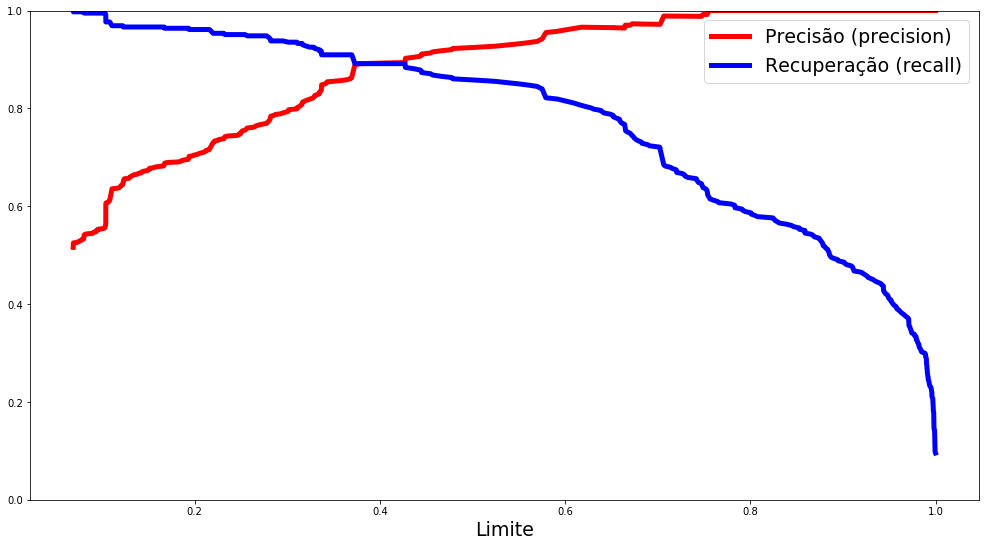

In [258]:
    # Plotando a curva de precisão X a curva de Recuperação

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precisão (precision)", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="Recuperação (recall)", linewidth=5)
    plt.xlabel("Limite", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(17, 9))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

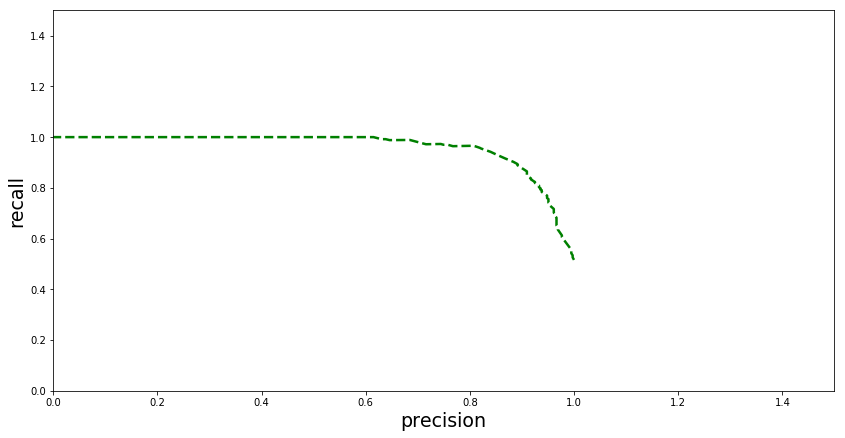

In [261]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

In [263]:
    # calcular taxa positiva verdadeira e taxa de falsos positivos

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

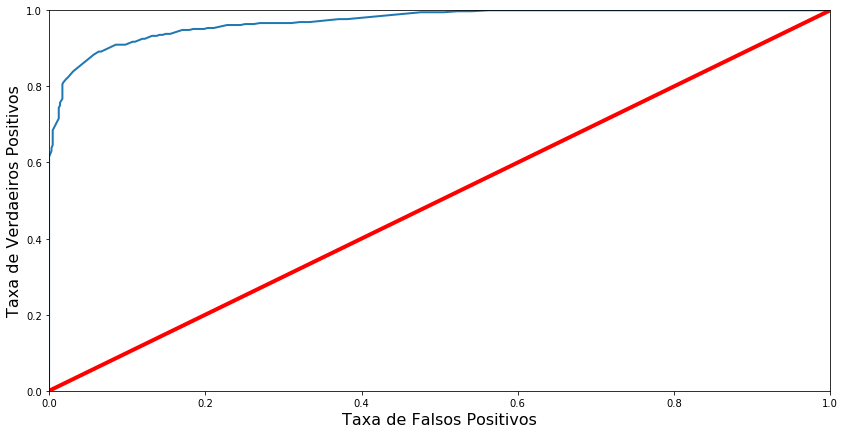

In [266]:
# plotando  a Curva ROC AUC
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Taxa de Falsos Positivos', fontsize=16)
    plt.ylabel('Taxa de Verdaeiros Positivos', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [270]:
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9703883981331252
